In [1]:
#Imports & Setup
!pip install openpyxl

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

# Check versions (optional but good for reproducibility)
print(f"Pandas version: {pd.__version__}")
print(f"Requests version: {requests.__version__}")

Pandas version: 1.3.5
Requests version: 2.29.0


In [2]:
#Collecting Data Using APIs
# API URL (Ensure the Flask app is running or use the provided data)
api_url = "http://127.0.0.1:5000/data"

def get_number_of_jobs_T(technology):
    payload = {'Key Skills': technology}
    response = requests.get(api_url, params=payload)
    if response.ok:
        data = response.json()
        number_of_jobs = len(data)
    else:
        number_of_jobs = 0
    return technology, number_of_jobs

# List of technologies to query
technologies = ['C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']

# Collect data
data_list = []
for tech in technologies:
    tech_name, count = get_number_of_jobs_T(tech)
    data_list.append({'Technology': tech_name, 'Number of Jobs': count})

# Save to DataFrame and Excel
df_jobs = pd.DataFrame(data_list)
df_jobs.to_excel('job-postings.xlsx', index=False)
print("Job postings data saved to 'job-postings.xlsx'")
df_jobs.head()

Job postings data saved to 'job-postings.xlsx'


,Technology,Number of Jobs
0,C,13498
1,C#,333
2,C++,0
3,Java,2609
4,JavaScript,355


In [3]:
#Web Scraping
# URL for the Popular Languages page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Get the page content
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

# Find the table and extract rows
table = soup.find('table')
popular_languages = []

for row in table.find_all('tr'):
    cols = row.find_all('td')
    if cols:
        lang = cols[1].getText()
        salary = cols[3].getText()
        popular_languages.append({'Language': lang, 'Average Annual Salary': salary})

# Clean up header row if captured
if popular_languages[0]['Language'] == 'Language':
    popular_languages.pop(0)

# Save to DataFrame and CSV
df_salary = pd.DataFrame(popular_languages)
df_salary.to_csv('popular-languages.csv', index=False)
print("Salary data saved to 'popular-languages.csv'")
df_salary.head()

Salary data saved to 'popular-languages.csv'


,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"


In [4]:
#Exploring the Dataset
# Load the datasets
df_jobs = pd.read_excel('job-postings.xlsx')
df_salary = pd.read_csv('popular-languages.csv')

# Data Cleaning
# Clean Salary column (remove '$' and ',')
df_salary['Average Annual Salary'] = df_salary['Average Annual Salary'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Sort Data
df_jobs_sorted = df_jobs.sort_values(by='Number of Jobs', ascending=False)
df_salary_sorted = df_salary.sort_values(by='Average Annual Salary', ascending=False)

print("Datasets loaded and cleaned.")
print(df_jobs_sorted.info())
print(df_salary_sorted.head())

Datasets loaded and cleaned.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Technology      12 non-null     object
 1   Number of Jobs  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
None
     Language  Average Annual Salary
4       Swift               130801.0
0      Python               114383.0
5         C++               113865.0
3  Javascript               110981.0
1        Java               101013.0


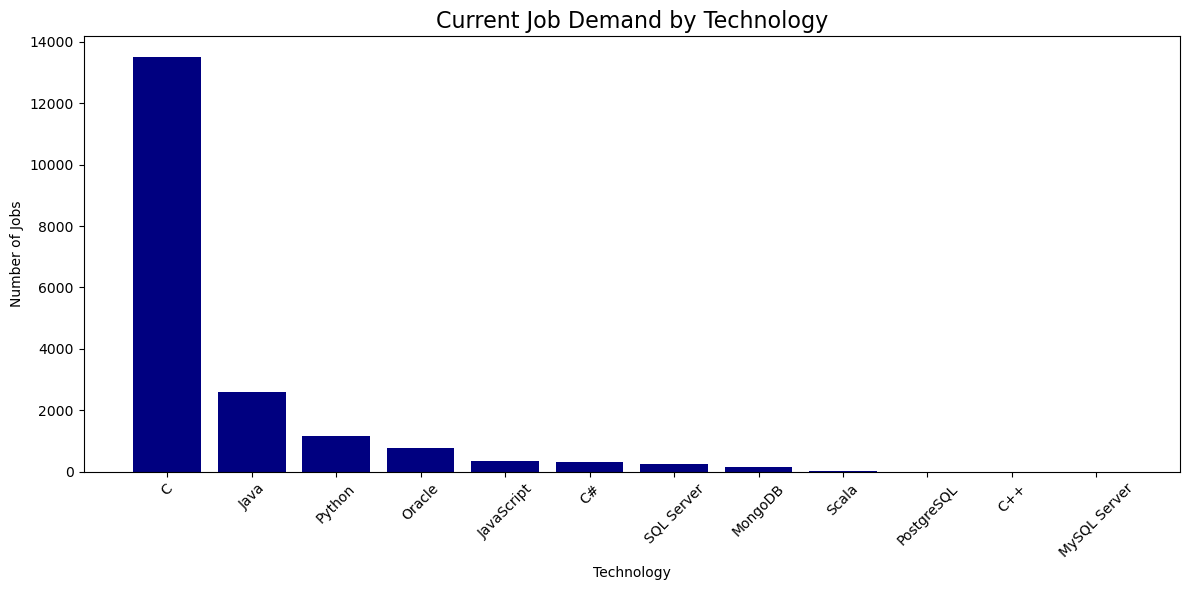

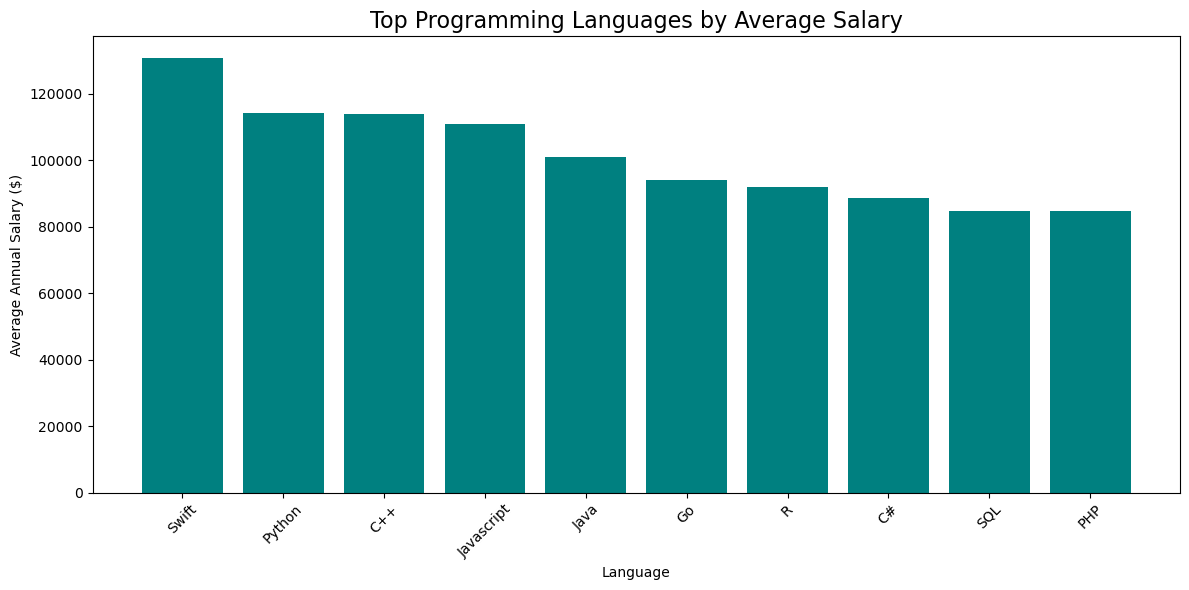

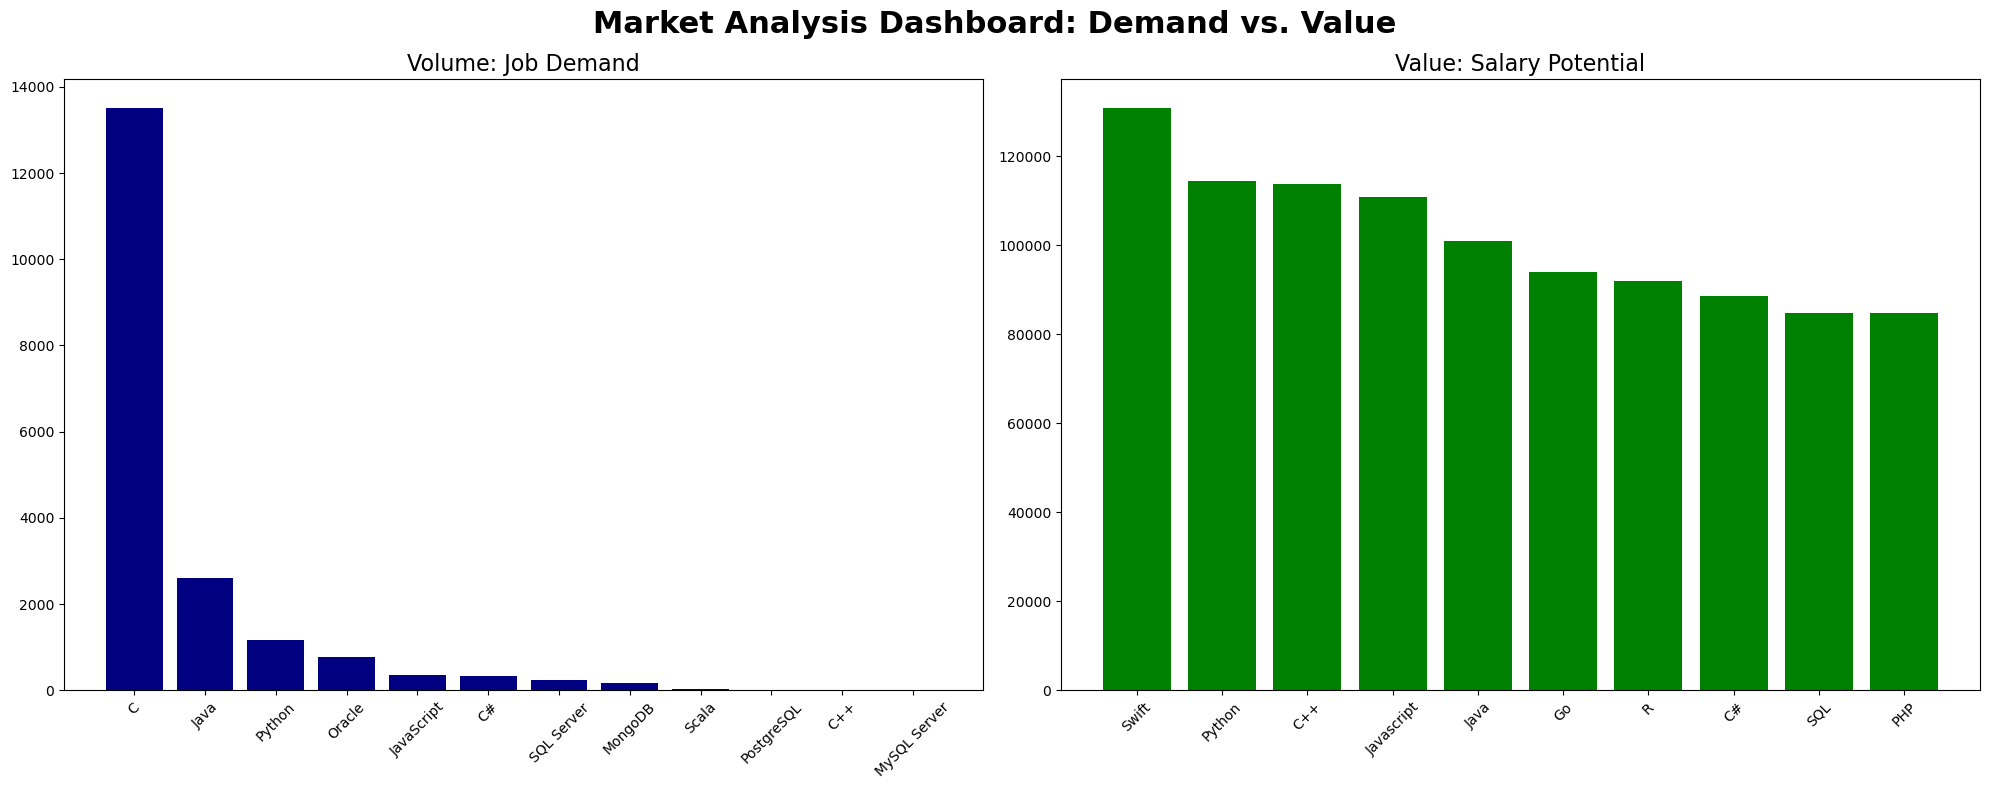

In [5]:
# Data Visualization (The Analysis)
# 1. Top 10 Technologies by Job Demand
plt.figure(figsize=(12, 6))
plt.bar(df_jobs_sorted['Technology'], df_jobs_sorted['Number of Jobs'], color='navy')
plt.title('Current Job Demand by Technology', fontsize=16)
plt.ylabel('Number of Jobs')
plt.xlabel('Technology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top Languages by Salary (Value)
plt.figure(figsize=(12, 6))
plt.bar(df_salary_sorted['Language'], df_salary_sorted['Average Annual Salary'], color='teal')
plt.title('Top Programming Languages by Average Salary', fontsize=16)
plt.ylabel('Average Annual Salary ($)')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Final Strategic Dashboard
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Market Analysis Dashboard: Demand vs. Value', fontsize=22, fontweight='bold')

# Chart A: Demand
axes[0].bar(df_jobs_sorted['Technology'], df_jobs_sorted['Number of Jobs'], color='navy')
axes[0].set_title('Volume: Job Demand', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)

# Chart B: Value
axes[1].bar(df_salary_sorted['Language'], df_salary_sorted['Average Annual Salary'], color='green')
axes[1].set_title('Value: Salary Potential', fontsize=16)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()